# Packages

In [42]:
#required packages
import pandas as pd
import plotly.express as px
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np

# reading data from csv file

In [36]:
#reading file
df=pd.read_csv("./data/Sentiment.csv",sep=',')

In [37]:
df.info()#getting details related to data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code       10 non-null     object 
 1   Fac_ID     10 non-null     object 
 2   studentID  10 non-null     object 
 3   Rating     10 non-null     float64
 4   feedBack   10 non-null     object 
dtypes: float64(1), object(4)
memory usage: 528.0+ bytes


# Data Visualization of Sentimental Analysis using plotly

In [71]:
#function for overall rating and rating distribution
def rating_des(df,Fac_id):
    ovrlr=pd.DataFrame(df.loc[df['Fac_ID']==Fac_id,'Rating'].value_counts())
    ovrlr=ovrlr.reset_index()
    ovrlr.columns=['rate','count']
    fig = plt.bar(ovrlr['rate'],ovrlr['count'],color=['red','green','blue','yellow'])
    return fig
    
def overall_rating(df,Fac_id='AG123'):
    ovr=df.loc[df['Fac_ID']==Fac_id,'Rating'].mean()
    return round(ovr,2)

In [70]:
# function for sentimental analysis
def senti(df,Fac_id):
    data=df
    po,nu,ne=0,0,0
    df1=data[data['Fac_ID']==Fac_id]
    for i in range(len(df1)):
        if TextBlob(df1.iloc[i, 4]).sentiment.polarity==0:
            nu+=1
        elif TextBlob(df1.iloc[i,4]).sentiment.polarity>0:
            po+=1
        else:
            ne+=1
    result=pd.DataFrame({"score":[po,ne,nu],"polarity":["positive","negative","neutral"]})
    fig = plt.bar(result['polarity'], result['score'], color=['green', 'red', 'blue'])
    return fig

def overall_senti(df,Fac_id='AG123'):
    df1=df[df['Fac_ID']==Fac_id]
    for i in range(len(df1)):
        overall=df1.iloc[i,4]+","
    if TextBlob(overall).sentiment.polarity==0:
        return "neutral"
    elif TextBlob(df1.iloc[i,4]).sentiment.polarity>0:
        return 'positive'
    else:
        return 'negative'

# Outputs

In [6]:
#getting overall rating for a faculty
overall_rating(df,"AG123")

3.83

In [7]:
#getting overall sentimental polarity for a faculty
overall_senti(df,"AG123")

'negative'

# Bar plots using plotly package

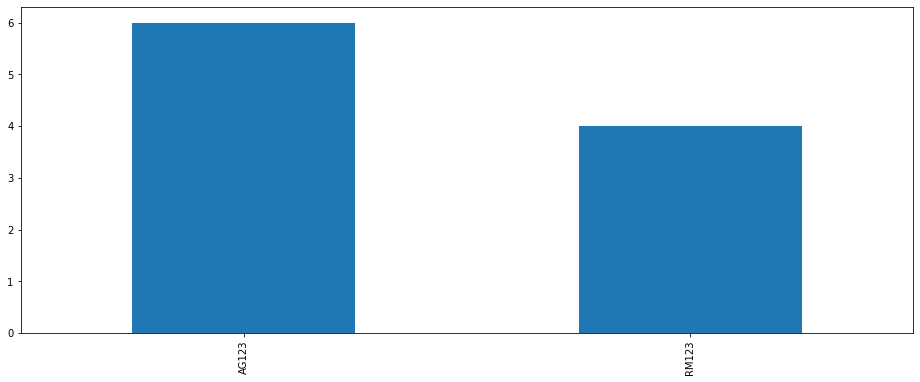

In [31]:
# Faculty distribution in dataset
df['Fac_ID'].value_counts().plot(kind="bar",figsize=(16,6))

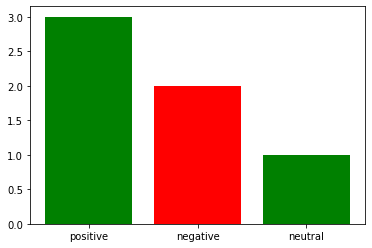

In [62]:
#getting polarity distribution
fig=senti(df,"AG123")

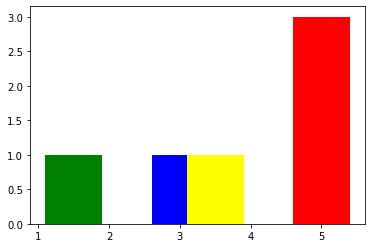

In [72]:
#getting rating distribution
fig1=rating_des(df,"AG123")

# using base plot to plot pie chart

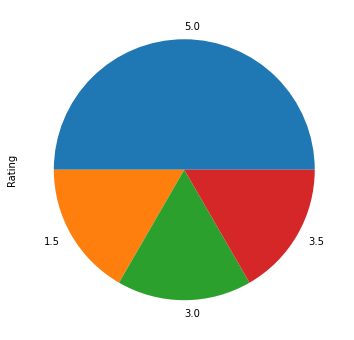

In [33]:
#piechart for rating destribution using base ploting method
df.loc[df['Fac_ID']=="AG123",'Rating'].value_counts().plot(kind="pie",figsize=(19,6))